# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seanendicott/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
print(api_key)

337e4f0a589840989f58cf07629b6522


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_headlines['articles'][0]


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Jay Peters',
 'title': 'Block and Blockstream are partnering with Tesla on an off-grid, solar-powered Bitcoin mine in Texas',
 'description': 'Block and Blockstream are partnering with Tesla on an open-source, solar-powered Bitcoin mine, the companies announced Friday. Tesla’s 3.8-megawatt Solar PV array and its 12 megawatt-hour Megapack will power the facility, and construction has started on the p…',
 'url': 'https://www.theverge.com/2022/4/8/23016553/block-blockstream-tesla-solar-bitcoin-mine-texas',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/OYrvaaOHBuEpdTeRO55nZnZdexs=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8937281/acastro_170726_1777_0007_v2.jpg',
 'publishedAt': '2022-04-08T16:02:52Z',
 'content': 'Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\n

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_headlines['articles'][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': "Hackers swipe nearly $600 million from a 'play to earn' crypto game",
 'description': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popular "play to earn" game where players can receive crypto in ex…',
 'url': 'https://www.engadget.com/axie-infnity-ronin-network-crypto-theft-194014547.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-03/6875e130-af90-11ec-ae65-a8e40222540c',
 'publishedAt': '2022-03-29T19:40:14Z',
 'content': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2022-04-08,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
1,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831
2,2022-04-05,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
3,2022-04-06,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912
4,2022-04-05,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-29,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898
1,2022-04-03,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
2,2022-04-05,April 5 (Reuters) - Ethereum blockchain scalin...,0.0000,0.000,0.000,1.000
3,2022-03-22,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000
4,2022-04-05,Regulatory solutions should be codified region...,0.7430,0.323,0.083,0.594


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.031470,0.055100,0.054900,0.890050
std,0.423376,0.061536,0.054379,0.069513
min,-0.771300,0.000000,0.000000,0.730000
25%,-0.421500,0.000000,0.000000,0.845250
50%,-0.057700,0.054500,0.054500,0.899000
75%,0.323650,0.083000,0.090250,0.924000
max,0.726900,0.197000,0.169000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.218590,0.090300,0.021300,0.888350
std,0.440832,0.124421,0.036021,0.136754
min,-0.510600,0.000000,0.000000,0.594000
25%,0.000000,0.000000,0.000000,0.825500
50%,0.000000,0.000000,0.000000,0.936500
75%,0.580775,0.161000,0.045750,1.000000
max,0.932700,0.349000,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score of 0.075050

Q: Which coin had the highest compound score?

A: Ethereum had the higher compound score of 0.834000

Q. Which coin had the highest positive score?

A: Ethereum had the higher positive score of 0.249000	

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
btc_str_text = str(bitcoin_df['text'])

btc_text = bitcoin_df['text']

In [13]:
eth_text = ethereum_df['text']

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return output


In [15]:
# Create a new tokens column for Bitcoin
#print(tokenizer(btc_text[0]))
btc_tokenized_list = []
for i in btc_text:
    x = tokenizer(i)
    btc_tokenized_list.append(x)
bitcoin_df['token'] = btc_tokenized_list


In [16]:
# Create a new tokens column for Ethereum

eth_tokenized_list = []
for i in eth_text:
    x = tokenizer(i)
    eth_tokenized_list.append(x)
ethereum_df['token'] = eth_tokenized_list


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
print(btc_tokenized_list)

[['set', 'open', 'later', 'yearif', 'buy', 'something', 'verge', 'link', 'vox', 'media', 'may', 'earn', 'commission', 'see', 'ethic', 'statementillustration', 'alex', 'castro', 'vergeblock', 'blockstream', 'char'], ['mr', 'spiekers', 'prominent', 'customer', 'described', 'whale', 'client', 'wa', 'eastern', 'european', 'organized', 'crime', 'member', 'prosecutor', 'said', 'mr', 'spieker', 'laundered', 'client', 'sai', 'char'], ['might', 'heard', 'crypto', 'twitter', 'corner', 'social', 'network', 'account', 'bored', 'apes', 'profile', 'picture', 'post', 'rife', 'talk', 'token', 'blockchains', 'buying', 'bitcoin', 'di', 'char'], ['wallet', 'usbc', 'fingerprint', 'reader', 'image', 'jessedorogusker', 'twitter', 'may', 'seen', 'bitcoin', 'hardware', 'wallet', 'jack', 'dorseys', 'block', 'company', 'formerly', 'known', 'char'], ['german', 'authority', 'seized', 'million', 'usd', 'bitcoingerman', 'authority', 'shut', 'server', 'infrastructure', 'russian', 'darknet', 'marketplace', 'hydra', '

In [19]:
# Generate the Bitcoin N-grams where N=2

btc_word_count = Counter([i for x in btc_tokenized_list for i in x])
bigram_counts = Counter(ngrams(btc_word_count, n=2))

In [20]:
# Generate the Ethereum N-grams where N=2
eth_word_count = Counter([i for x in eth_tokenized_list for i in x])
bigram_counts = Counter(ngrams(eth_word_count, n=2))

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
#btc_tokens = bitcoin_df['token'] 
btc_top_ten = token_count(btc_word_count, N=3)
print(btc_top_ten)

[('char', 20), ('bitcoin', 14), ('crypto', 7), ('reuters', 7), ('march', 6), ('million', 5), ('week', 5), ('world', 4), ('salvador', 4), ('wa', 3)]


In [23]:
# Use token_count to get the top 10 words for Ethereum

eth_top_ten = token_count(eth_word_count, N=3)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

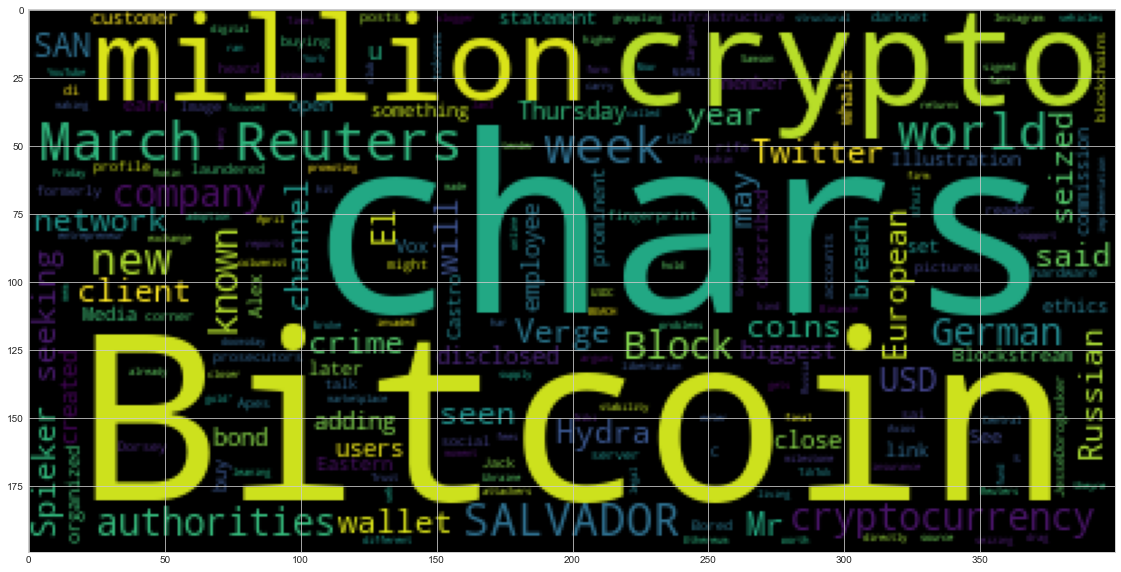

In [25]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_text)

wc = WordCloud().generate(big_string)
plt.imshow(wc)

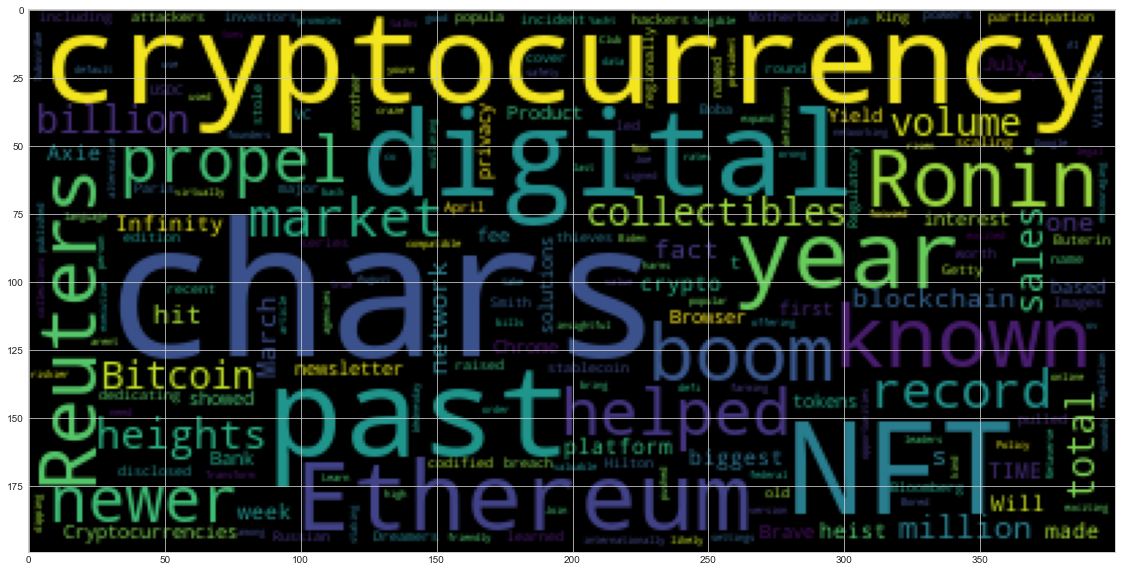

In [26]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_text)

wc = WordCloud(collocations=False).generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [69]:
# Concatenate all of the Bitcoin text together

flat_list = [item for sublist in btc_tokenized_list for item in sublist]
btc_str = str(flat_list)    

type(btc_str)

str

In [70]:
# Run the NER processor on all of the text
#doc = list(nlp.pipe(flat_list))
doc = nlp(btc_str)
# Add a title to the document
doc.user_data["title"] = "Bitcoin"


In [71]:
# Render the visualization
#displacy.serve(doc, style="ent")
displacy.render(doc, style='ent')

In [72]:
# List all Entities
print([(ent.text, ent.label_) for ent in doc.ents])



[('friday', 'DATE'), ('russia', 'GPE'), ("'year'", 'DATE'), ('miami', 'GPE'), ('thursday', 'DATE'), ("'jan'", 'DATE'), ("'week'", 'DATE'), ('sunday', 'DATE'), ("'week'", 'DATE'), ('today', 'DATE'), ('sec', 'ORG'), ('december', 'DATE'), ("'week'", 'DATE'), ('weekly', 'DATE'), ("'week'", 'DATE'), ('london', 'GPE'), ('thursday', 'DATE'), ('first', 'ORDINAL'), ("'quarter'", 'DATE'), ("'week'", 'DATE')]


---

### Ethereum NER

In [74]:
# Concatenate all of the Ethereum text together

eth_list = [item for sublist in eth_tokenized_list for item in sublist]
eth_str = str(eth_list)    


In [75]:
# Run the NER processor on all of the text
doc = nlp(eth_str)

# Add a title to the document
doc.user_data["title"] = "Ethereum"

In [76]:
# Render the visualization
displacy.render(doc, style='ent')

In [77]:
# List all Entities
print([(ent.text, ent.label_) for ent in doc.ents])

[("'week'", 'DATE'), ('july', 'DATE'), ('july', 'DATE'), ('august', 'DATE'), ("'year'", 'DATE'), ("'year'", 'DATE'), ("'year'", 'DATE'), ('wednesday', 'DATE'), ('weekly', 'DATE'), ('sunday', 'DATE'), ("'year'", 'DATE'), ("'year'", 'DATE'), ('second', 'ORDINAL'), ("'week'", 'DATE'), ('monday', 'DATE'), ('first', 'ORDINAL'), ('thursday', 'DATE'), ('miami', 'GPE'), ('february', 'DATE')]


---